#Bùi Quang Hậu_19144255_Fruit_CNN

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
url='../input/fruit-cnn/fruit_train'

In [ ]:
generator= ImageDataGenerator(rescale=1./255,validation_split=0.2,rotation_range=0.1,width_shift_range=0.1,zoom_range=0.1)
train_data=generator.flow_from_directory(url,target_size=(100,100),batch_size=128,class_mode='categorical',subset='training')
validation_dataset=generator.flow_from_directory(url,target_size=(100,100),batch_size=128,class_mode='categorical',subset='validation')

Found 3539 images belonging to 10 classes.
Found 880 images belonging to 10 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,3))) #size:32x32, 3 kenh mau
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)       

In [ ]:
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data,epochs=30,batch_size=128,validation_data=validation_dataset,verbose=1)
score=model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là:',score[0])
print('Độ chính xác kiểm tra là:',score[1])

Epoch 1/30
28/28 [==============================] - 15s 529ms/step - loss: 2.1365 - accuracy: 0.2786 - val_loss: 1.5978 - val_accuracy: 0.5318
Epoch 2/30
28/28 [==============================] - 15s 522ms/step - loss: 1.1637 - accuracy: 0.5533 - val_loss: 0.8965 - val_accuracy: 0.6920
Epoch 3/30
28/28 [==============================] - 15s 530ms/step - loss: 0.6631 - accuracy: 0.7485 - val_loss: 0.4342 - val_accuracy: 0.9057
Epoch 4/30
28/28 [==============================] - 14s 514ms/step - loss: 0.3954 - accuracy: 0.8483 - val_loss: 0.3271 - val_accuracy: 0.9466
Epoch 5/30
28/28 [==============================] - 14s 503ms/step - loss: 0.2853 - accuracy: 0.8926 - val_loss: 0.2438 - val_accuracy: 0.9068
Epoch 6/30
28/28 [==============================] - 15s 533ms/step - loss: 0.1725 - accuracy: 0.9421 - val_loss: 0.1532 - val_accuracy: 0.9500
Epoch 7/30
28/28 [==============================] - 14s 494ms/step - loss: 0.1380 - accuracy: 0.9537 - val_loss: 0.3706 - val_accuracy: 0.8057

In [ ]:
model.save('./final_fruit.h5')

In [ ]:
model=load_model('./final_fruit.h5')

In [ ]:
validation_dataset.class_indices

{'Apple Crimson Snow': 0,
 'Apple Golden 2': 1,
 'Avocado ripe': 2,
 'Banana': 3,
 'Cantaloupe 2': 4,
 'Cherry Wax Black': 5,
 'Pear Stone': 6,
 'Physalis': 7,
 'Strawberry': 8,
 'Watermelon': 9}

4


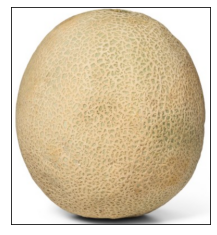

In [ ]:
url='../input/canta11/canta1.png'
img=load_img(url,target_size=(100,100))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img/255
print(np.argmax(model.predict(img)))

Found 4 images belonging to 1 classes.


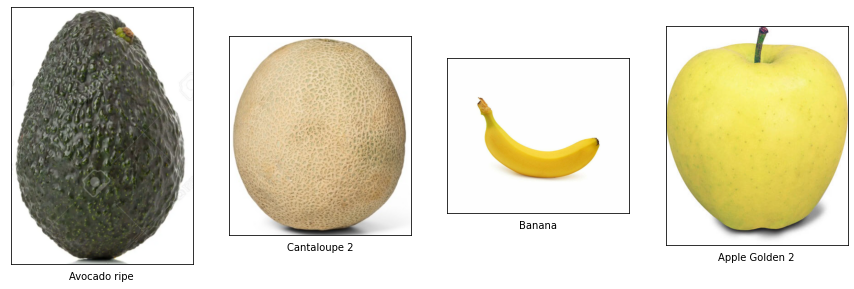

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
datagenerator=datagen.flow_from_directory('../input/test-fruittt',
                                          target_size=(100,100),batch_size=5,
                                          interpolation="lanczos",shuffle=False)
fruit={0:'Apple Crimson Snow',
 1:'Apple Golden 2',
 2:'Avocado ripe',
 3:'Banana',
 4:'Cantaloupe 2',
 5:'Cherry Wax Black',
 6:'Pear Stone',
 7:'Physalis',
 8:'Strawberry',
 9:'Watermelon'}
plt.figure(figsize=(15,15))   #chiều dài với rộng của khung ảnh
for i in range(len(datagenerator.filenames)):
    plt.subplot(1,4,i+1)      #kích thước của khung ảnh, 8: dài, 5 rộng, chỗ số 8 để lớn hơn ko sao, nhưng nhớ 8*5 phải lớn hơn số ảnh test
    plt.imshow(load_img(datagenerator.filepaths[i]))
    plt.xticks([])
    plt.yticks([])
    img=load_img('../input/test-fruittt/'+datagenerator.filenames[i],target_size=(100,100)) #nhớ có cái / này nha
    img=img_to_array(img)
    img=img.reshape(1,100,100,3)
    img=img.astype('float')
    img/=255
    plt.xlabel(fruit[np.argmax(model.predict(img))])  #tên model lúc mà chạy xong á (model_1)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
